# Introductory applied machine learning (INFR10069) 

# Lab 4: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located at the `./datasets` directory which is adjacent to this file.

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Download the `spambase_binary.csv` dataset and load it into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [4]:
spambase = pd.read_csv('datasets/spambase_binary.csv')
print(spambase.shape)
spambase.head(5)

(4601, 55)


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
Use [Hold-out validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html) to split the dataset into training and testing subsets. Use 90% of the data for training and the remaining 10% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`. Make sure you don't include the target variable `is_spam` in the input features.

In [6]:
X = spambase.drop('is_spam', axis = 1)
y = spambase['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 0)

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [8]:
lrc = LogisticRegression(solver = 'lbfgs')
lrc.fit(X_train, y_train)
print('Training accuracy: {}'.format(lrc.score(X_train, y_train)))
print('Testing accuracy: {}'.format(lrc.score(X_test, y_test)))

Training accuracy: 0.935024154589
Testing accuracy: 0.9284164859


It would appear so. The score on testing data is only slightly lower than on training data, and both are high.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`. Generally, we would expect the string $ to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [19]:
print('Coefficient for "hp": {}'.format(lrc.coef_[0, spambase.columns.get_loc('word_freq_hp_binarized')]))
print('Coefficient for "$": {}'.format(lrc.coef_[0, spambase.columns.get_loc('char_freq_$_binarized')]))

Coefficient for "hp": -2.63934720019
Coefficient for "$": 1.69864273325


The regression coefficients make perfect sense given that class 1 is spam. The word "hp" has a negative coefficient, making its appearance less likely to be spam, as expected. Conversely, "$" has a positive coefficient, making emails containing it more likely to be spam.

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [20]:
svc = LinearSVC()
svc.fit(X_train, y_train)
print('Training accuracy: {}'.format(svc.score(X_train, y_train)))
print('Testing accuracy: {}'.format(svc.score(X_test, y_test)))

Training accuracy: 0.934541062802
Testing accuracy: 0.919739696312


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [21]:
print('Coefficient for "hp": {}'.format(svc.coef_[0, spambase.columns.get_loc('word_freq_hp_binarized')]))
print('Coefficient for "$": {}'.format(svc.coef_[0, spambase.columns.get_loc('char_freq_$_binarized')]))

Coefficient for "hp": -0.856770251024
Coefficient for "$": 0.569353986427


As with the logistic regression classifier, the coefficients here are respectively negative and positive, as expected.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

Both the support vector machine and logistic regression classification methods operate by optionally applying a linear transformation to the input space, and then finding the decision boundary between classes. However, logistic regression accomplishes this by using the distance of data points from the boundary (and which side) to calculate their log likelihood of being in one class or another, and is trained by maximizing this value over the input. Support vector machines are instead trained by solving for the optimal hyperplane based on points on its "margin" (closest to it), and classifies new data based on its similarity to these few vectors.

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [27]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
print('Gaussian training accuracy: {}'.format(svc.score(X_train, y_train)))
print('Gaussian testing accuracy: {}'.format(svc.score(X_test, y_test)))

print()

svc = SVC(kernel = 'poly')
svc.fit(X_train, y_train)
print('Polynomial training accuracy: {}'.format(svc.score(X_train, y_train)))
print('Polynomial testing accuracy: {}'.format(svc.score(X_test, y_test)))

Gaussian training accuracy: 0.934299516908
Gaussian testing accuracy: 0.930585683297

Polynomial training accuracy: 0.800241545894
Polynomial testing accuracy: 0.809110629067


With a Gaussian kernel, the SVC performs roughly as well as with the linear kernel seen in question 1.5, with only slightly higher scores on training and testing data. The polynomial kernel, however, does significantly worse than either, with training and test accuracies over 10 percentage points lower.

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. Read the description at the link above for a brief overview of how this works. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [29]:
splice_train = pd.read_csv('datasets/splice_train.csv')
print('Train shape: {}'.format(splice_train.shape))
splice_train.head(10)

Train shape: (2935, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [30]:
splice_test = pd.read_csv('datasets/splice_test.csv')
print('Test shape: {}'.format(splice_test.shape))
splice_test.head(10)

Test shape: (255, 61)


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) tool. Make sure to not transform the target variable (`class`).

In [31]:
les = {}
for col in splice_train.columns[:-1]:
    le = LabelEncoder()
    splice_train[col] = le.fit_transform(splice_train[col])
    splice_test[col] = le.transform(splice_test[col])
    les[col] = le

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [32]:
X_train = splice_train.drop('class', axis = 1)
y_train = splice_train['class']
X_test = splice_test.drop('class', axis = 1)
y_test = splice_test['class']

print('Training shapes: (X, y) = ({}, {})'.format(X_train.shape, y_train.shape))
print('Testing shapes: (X, y) = ({}, {})'.format(X_test.shape, y_test.shape))

Training shapes: (X, y) = ((2935, 60), (2935,))
Testing shapes: (X, y) = ((255, 60), (255,))


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbors Classification](http://scikit-learn.org/stable/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbor. Report the classification accuracy on the training set.

In [33]:
knc = KNeighborsClassifier(n_neighbors = 1)
knc.fit(X_train, y_train)

print('Training accuracy: {}'.format(knc.score(X_train, y_train)))

Training accuracy: 0.999659284497


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

The above is not meaningful, because when classifying the points in the training data, their nearest neighbor will always be themselves, so if it only looks at one neighbor it will always be correct. I do not expect the performance to be anywhere near as good on the test set.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [35]:
print('Testing accuracy: {}'.format(knc.score(X_test, y_test))) # much worse, as expected

Testing accuracy: 0.611764705882


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas bulit-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html). 

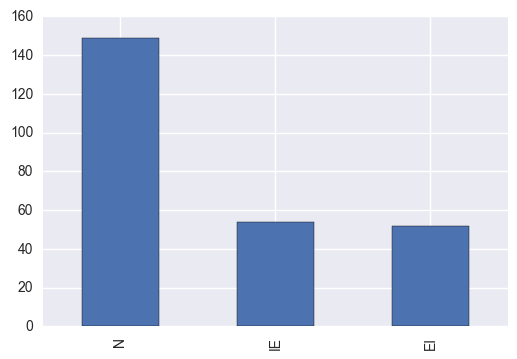

In [43]:
plt.figure()
counts_test = y_test.value_counts()
counts_test.plot.bar()
plt.show()

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`?

In [44]:
print('Classify all as N accuracy: {}'.format(counts_test['N'] / counts_test.sum()))

Classify all as N accuracy: 0.58431372549


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the base rate again.*

In [48]:
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
scores = []
for k in ks:
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    score = knc.score(X_test, y_test)
    scores.append(score)
    print('k = {}, score = {}'.format(k, score))

k = 5, score = 0.643137254902
k = 10, score = 0.654901960784
k = 50, score = 0.682352941176
k = 100, score = 0.662745098039
k = 200, score = 0.666666666667
k = 500, score = 0.690196078431
k = 1000, score = 0.694117647059
k = 1500, score = 0.58431372549
k = 2000, score = 0.58431372549


As k increases to 1000, the classifier's score continues to rise. This is because it generalizes to unseen data better, as it has more information to compare each point to. However, between k = 1000 and k = 1500, we can see that it reaches a critical value where the dominance of class 'N' in the data causes all input to be classified as such.

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

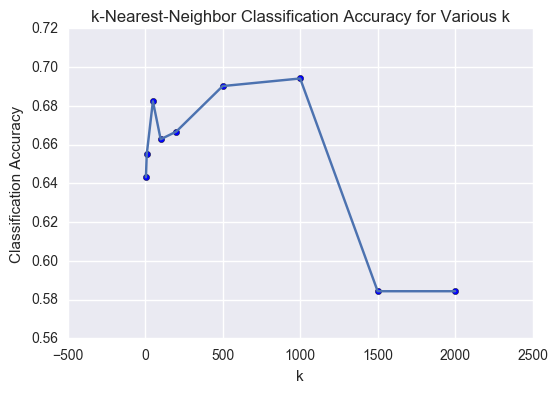

In [60]:
plt.scatter(ks, scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Classification Accuracy')
plt.title('k-Nearest-Neighbor Classification Accuracy for Various k')
plt.show()

As mentioned above, this plot demonstrates that the classification accuracy generally increases with k until around 1000,
after which point everything is classified as class 'N' since it's the most common in training data.

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set. Then plot the confusion matrix for a 5-nearest neighbor classifier. What do you observe?

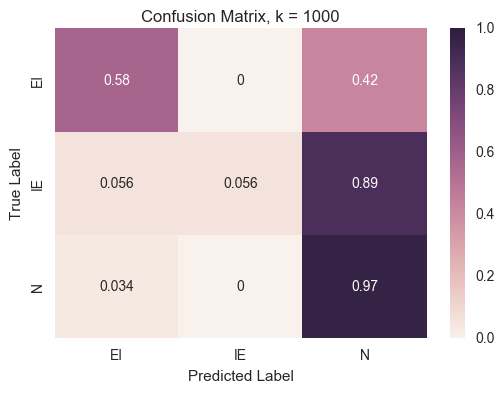

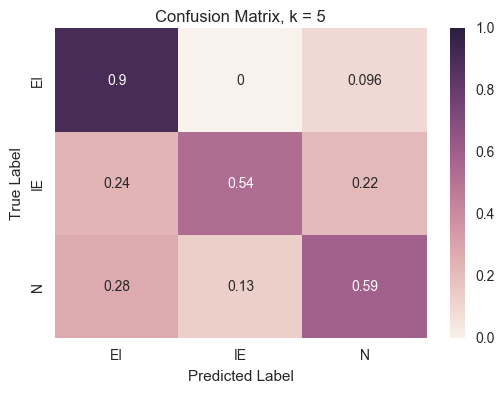

In [64]:
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

for k in [1000, 5]:
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    cm = confusion_matrix(y_test, knc.predict(X_test))
    plot_confusion_matrix(cm / cm.sum(axis=1)[:, np.newaxis],
                          classes = knc.classes_,
                          title = 'Confusion Matrix, k = {}'.format(k))
    plt.show()

With 1000 nearest neighbors, class 'N' is almost always predicted correctly, but most other data is also incorrectly predicted as class 'N'. Class 'IE' is almost never predicted, and 'EI' is only correct slighly more than half the time.

With 5 nearest neighbors, class 'EI' is instead predicted correctly most of the time, but the other two classes are correct slightly more than half the time. Thus, it is fair to say that k = 5 has better performance distinguishing all three classes, while k = 1000's score is heavily reliant on the fact that 'N' is usually the correct class, and only really distinguishes between 'EI' and everything else.

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss) metric which is often used in neural networks. 

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence (i.e. probability) that these are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts tha the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss`  metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was your metric of interest?

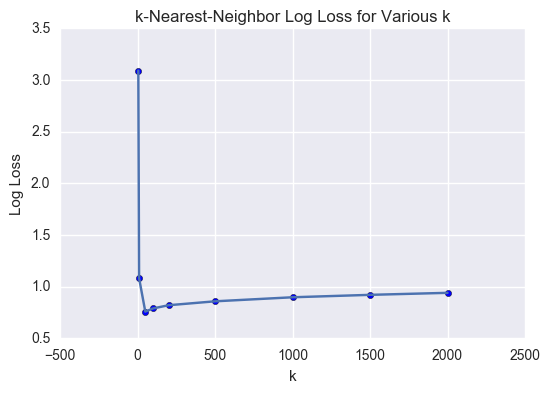

In [69]:
lls = []
for k in ks:
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    lls.append(log_loss(y_test, knc.predict_proba(X_test)))

plt.scatter(ks, lls)
plt.plot(ks, lls)
plt.xlabel('k')
plt.ylabel('Log Loss')
plt.title('k-Nearest-Neighbor Log Loss for Various k')
plt.show()

If log_loss was my metric of interest, I would pick k= 50 since it has the minimum log loss of all tested values of k.

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

One could not use the log_loss metric to evaluate the performance of a SVM classifier. This is due to the fact that SVMs are not probability based, but instead classify a point based on its similarity with the trained support vectors, which is calculated by taking the sign of the sum of its inner product with the support vectors times their coefficient and classification sign.